In [1]:
#Fundamental Library
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
from IPython import display
import PIL
import imageio
import glob

#Random 
import random as rd
import time

#tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#path
import os

Question
1) 왜 Buffer_Size와 Batch_Size를 통해서 Shuffle을 하는가?
2) 왜 -1 ~ 1로 preprocessing을 하는가?
3) Generator Model을 만들때, layer Dense에 대한 갯수, BatchNormalization 그리고 왜 ReLU가 아니라 LeakyRelu를 쓰는가?
4) 왜 Generator Model에서 나머지 model.add에 BatchNormalization이 NONE값을 부여하는가?
5) Generator Model에서 Conv2DTranspose는 무슨 역할을 하는가?

Answer

1)
2)
3)
4)
5)

In [24]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

train_images = x_train.reshape(x_train.shape[0], 28,28,1).astype(float)
train_images = (train_images - 127.5)/127.5

BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [29]:
print(len(x_train[0]) , " " , len(x_train[0][0])) # 28 / 28 / 1 <shape>

28   28
0


In [30]:
len(x_train) # Buffer_Size = 60000인 이유

60000

In [3]:
print(x_train.min(), " " ,x_train.max(),"\n")
print(train_images.min(), " ", train_images.max())

0   255 

-1.0   1.0


In [9]:
# Generator

def generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias = False, input_shape = (100,))) # Dense가 왜 7 * 7 * 256으로 했을까? 다른 곳은 256 512 1024로 2 ^ {8,9,10} 형식으로 하던데
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

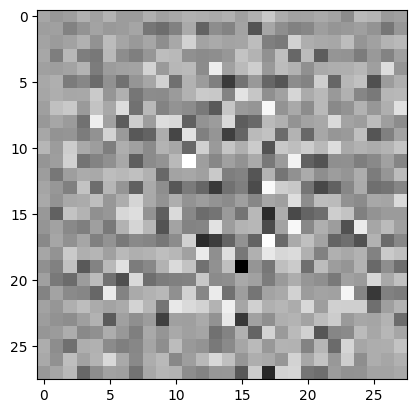

In [14]:
generator = generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')